In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D, Flatten,LeakyReLU
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.preprocessing.image import ImageDataGenerator


In [3]:
train_dir=!unzip /content/drive/MyDrive/train.zip
test_dir=!unzip /content/drive/MyDrive/test.zip

In [4]:
train="/content/train"
test="/content/test"

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train,
        target_size=(48,48),
        batch_size=16,
        color_mode="grayscale",
        class_mode='categorical'
        ,shuffle=False)
validation_generator = val_datagen.flow_from_directory(
        test,
        target_size=(48,48),
        batch_size=16,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [15]:
model = Sequential()
#1
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(48,48,1)))

model.add(LeakyReLU(alpha=0.1))
#2
model.add(Conv2D(32, kernel_size=(3, 3)))

model.add(LeakyReLU(alpha=0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.20))
#3
model.add(Conv2D(64, kernel_size=(3, 3)))

model.add(LeakyReLU(alpha=0.1))

#
model.add(Dropout(0.20))



model.add(MaxPooling2D(pool_size=(2, 2)))
#4
model.add(Conv2D(64, kernel_size=(3, 3)))

model.add(LeakyReLU(alpha=0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.20))

model.add(Flatten())

model.add(Dense(512))

model.add(LeakyReLU(alpha=0.1))

model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 44, 44, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        1

In [16]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6)
                      ,metrics=['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3,min_delta=0.005)

checkpoint=ModelCheckpoint('model',monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True,model='auto',period=1)


model_info = model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 16,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=7178 // 16
    ,callbacks=[callback,checkpoint])

#Found 28709 images belonging to 7 classes.
#Found 7178 images belonging to 7 classes.

Epoch 1/100
1794/1794 [==============================] - ETA: 0s - loss: 1.8403 - accuracy: 0.2405
Epoch 00001: val_accuracy improved from -inf to 0.24749, saving model to model
1794/1794 [==============================] - 15s 8ms/step - loss: 1.8403 - accuracy: 0.2405 - val_loss: 1.7966 - val_accuracy: 0.2475
Epoch 2/100
1790/1794 [============================>.] - ETA: 0s - loss: 1.7430 - accuracy: 0.2945
Epoch 00002: val_accuracy improved from 0.24749 to 0.36900, saving model to model
1794/1794 [==============================] - 15s 8ms/step - loss: 1.7427 - accuracy: 0.2945 - val_loss: 1.6674 - val_accuracy: 0.3690
Epoch 3/100
1789/1794 [============================>.] - ETA: 0s - loss: 1.6153 - accuracy: 0.3738
Epoch 00003: val_accuracy improved from 0.36900 to 0.40932, saving model to model
1794/1794 [==============================] - 15s 8ms/step - loss: 1.6157 - accuracy: 0.3734 - val_loss: 1.5604 - val_accuracy: 0.4093
Epoch 4/100
1790/1794 [============================>.] - E

In [21]:
model.save_weights('model.h5')

In [17]:
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict_generator(validation_generator,  7178// 16+1)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

print(confusion_matrix(validation_generator.classes, y_pred))

print('Classification Report')

target_names = ["Angry","Disgust","Fear","Happy","Neutral","Sad","Surprise"]

print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 462    9   81   66  119  190   31]
 [  19   65    6    1    2   16    2]
 [  77    5  418   49  124  241  110]
 [  47    1   46 1479   87   77   37]
 [  71    4   60  124  708  240   26]
 [  89    3  125   94  199  714   23]
 [  13    0   52   34   28   33  671]]
Classification Report
              precision    recall  f1-score   support

       Angry       0.59      0.48      0.53       958
     Disgust       0.75      0.59      0.66       111
        Fear       0.53      0.41      0.46      1024
       Happy       0.80      0.83      0.82      1774
     Neutral       0.56      0.57      0.57      1233
         Sad       0.47      0.57      0.52      1247
    Surprise       0.75      0.81      0.78       831

    accuracy                           0.63      7178
   macro avg       0.64      0.61      0.62      7178
weighted avg       0.63      0.63      0.63      7178



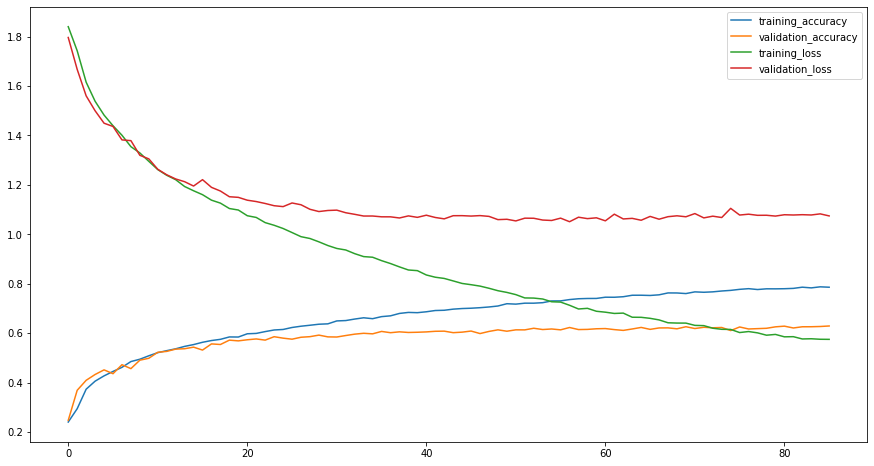

In [18]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15,8))

plt.plot(model_info.history["accuracy"],label="training_accuracy")

plt.plot(model_info.history["val_accuracy"],label="validation_accuracy")

plt.plot(model_info.history["loss"],label="training_loss")

plt.plot(model_info.history["val_loss"],label="validation_loss")

plt.legend()


In [12]:
model.save_weights('model.h5')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 44, 44, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        1